# Notebook Tutorial: Apartment Price Prediction

Supervised learning is a type of machine learning where we train a model on a labeled dataset, meaning that each example in the training set has an associated output. In regression tasks, the output is a continuous value. This tutorial will guide you through using supervised learning to predict the price of an apartment based on its size.

## 1) Data

**First step: Data Preparation**

In this section, we will load and prepare our dataset. The data includes various features of apartments, but for the initial part of this tutorial, we will focus on using the `size` of the apartment to predict its `price`. We will prepare our dataset by converting the data into NumPy arrays, which are often used for performing efficient calculations in machine learning tasks.

**Tasks:**

* Load the data into a NumPy array.
* Extract the size as the feature and price as the target in separate NumPy arrays.
* Display the first few elements from both arrays to verify the data.

<details>
    <summary>Hint: More information on using NumPy (Click to open!)</summary>
    <p>For comprehensive details on NumPy and its functions, you can refer to the official <a href="https://numpy.org/doc/">NumPy documentation</a>. It offers a thorough exploration of all features and functionalities of NumPy, suitable for both beginners and advanced users.</p>
    <p>If you're looking for a more engaging and visually appealing introduction to NumPy, check out Jay Alammar's <a href="https://jalammar.github.io/visual-numpy/">Visual Introduction to NumPy</a>. This guide provides an excellent visual representation of how NumPy operations work, making it easier to grasp complex concepts through diagrams and explanations.</p>
</details>


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = [
    {"size": 19, "price": 440, "rooms": 1, "distance_to_center": 7, "location": "Nienberge"},
    {"size": 32, "price": 500, "rooms": 1, "distance_to_center": 5.5, "location": "Gremmendorf"},
    {"size": 69, "price": 810, "rooms": 3, "distance_to_center": 5.5, "location": "Münster-Südost"},
    {"size": 60, "price": 900, "rooms": 2, "distance_to_center": 5.5, "location": "Münster-West"},
    {"size": 20, "price": 500, "rooms": 1, "distance_to_center": 1.5, "location": "Hansaviertel"},
    {"size": 18, "price": 660, "rooms": 1, "distance_to_center": 2.5, "location": "Münster Mitte-Nordost"},
    {"size": 52, "price": 790, "rooms": 3, "distance_to_center": 1, "location": "Münster City Center"},
    {"size": 45, "price": 1795, "rooms": 2, "distance_to_center": 1, "location": "Boeselagerstraße"},
    {"size": 50, "price": 1895, "rooms": 2, "distance_to_center": 1, "location": "Julius-Leber-Straße"}
]

# Convert to NumPy arrays
size = np.array([apt['size'] for apt in data])
price = np.array([apt['price'] for apt in data])

# Display the first few elements
print("Sizes:", size[:5])
print("Prices:", price[:5])


Sizes: [19 32 69 60 20]
Prices: [440 500 810 900 500]


**Second step: Visualizing the Data**

It's essential to visually explore the data to understand the relationship between features and target, which can provide insights before building any models.

**Tasks:**

* Plot the relationship between the `size` of the apartments and their `price`s using a scatter plot. Try other plots as well.

<details>
    <summary>Hint: Documentation for using matplotlib</summary>
    <p>For additional details and assistance on creating plots, check out the excellent (in my opinion) <a href="https://matplotlib.org">Matplotlib documentation</a>. The documentation is divided into various sections including tutorials, examples, and cheatsheets that you can use to enhance your plotting skills. For a specific example on creating basic plots, visit <a href="https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py">this section</a> of the Matplotlib documentation.</p>
</details>

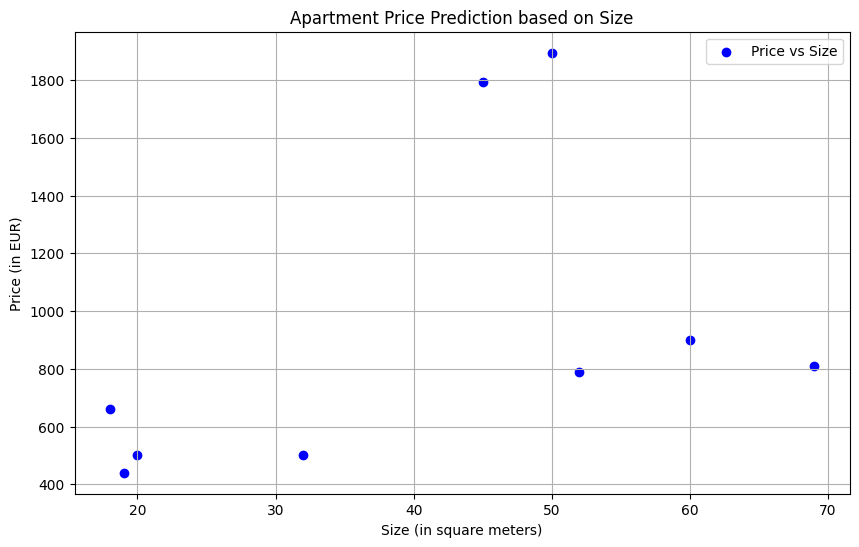

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(size, price, color='blue', label='Price vs Size')
plt.title('Apartment Price Prediction based on Size')
plt.xlabel('Size (in square meters)')
plt.ylabel('Price (in EUR)')
plt.legend()
plt.grid(True)
plt.show()


---

## 2) Introducing a (most) simple model

In the second part of your notebook, you will work on a basic model class that mimics the simple structure of Scikit-Learn's [model interface](https://scikit-learn.org/stable/modules/linear_model.html#). The typical naming convention in Scikit-Learn for methods in a model class are `fit` for training the model and `predict` for making predictions. Let's create a basic model class that adheres to this interface:


In [3]:
class SimpleModel:
    def __init__(self):
        self.stored_value = None

    def fit(self, X, y):
        """
        Fit the model to the data.
        Since this is a simple model, we'll just store the first value from y.

        Parameters:
        - X: array-like, shape (n_samples, n_features)
          Training data, where n_samples is the number of samples and n_features is the number of features.
          This model does not use `X` since it's overly simplistic.
        - y: array-like, shape (n_samples,)
          Target values.

        Returns:
        self: object
          Returns an instance of itself.
        """
        self.stored_value = y[0]
        return self  # It's a good practice to return self in the fit method.

    def predict(self, X):
        """
        Make predictions using the model.
        This model returns the stored value for any input.

        Parameters:
        - X: array-like, shape (n_samples, n_features)
          Input data for which predictions are made. This model does not use `X` to generate predictions.
        
        Returns:
        predictions: list
          A list containing the `stored_value` repeated for each input sample.
        """
        return [self.stored_value for _ in X]

# Example usage
model = SimpleModel()
model.fit(None, [10, 20, 30])  # Suppose 10 is the price based on the training data
print("Predictions:", model.predict([None, None, None]))  # Output will be [10, 10, 10]


Predictions: [10, 10, 10]


**Explanation:**

1. *Initialization* (`__init__`): This method sets up the model. In our case, it initializes `stored_value` to `None`. 
2. *Fit* (`fit`): This method is supposed to train the model. Here, it merely stores the first element of `y`, simplifying the concept of learning. 
3. *Predict* (`predict`): This method is expected to provide predictions based on learned parameters. Our simple model just repeats the stored value for as many inputs as are in `X`.

**Task: Fit a line through the first two data points**

We will start by fitting a straight line using only the first two data points from our apartment dataset. This will provide a basic understanding of how linear models estimate relationships between variables.
This means, we try to establish a linear relationship between the size of an apartment and its price using only the first two data points. This basic model will illustrate the concept of linear regression in its simplest form.

**Task Breakdown**

* Extract the tirst two Data Points: Use the size as the independent variable (`x`) and the price as the dependent variable (`y`).
* Calculate the Slope and Intercept: Apply the formulas to compute the slope and intercept.
* Plot the Results: To visualize how well the line fits these two points.

*Mathematical Formula for Line*
The slope $(m)$ of the line connecting two points $(x_1, y_1)$ and $(x_2, y_2)$ can be calculated using:
$[ m = \frac{y_2 - y_1}{x_2 - x_1} ]$

Once the slope is determined, the intercept $(b)$ can be computed using one of the point's coordinates (e.g., $(x_1, y_1)$):
$[ b = y_1 - m \cdot x_1 ]$


In [4]:
class SimpleLinearModel:
    """
    A simple linear regression model that calculates the slope and intercept manually
    from the first two data points and uses these to make predictions.
    """
    def __init__(self):
        self.slope = None
        self.intercept = None

    def set_params(self, m, b):
        """Set slope (m) and intercept (b) directly."""
        self.slope = m  # Set slope
        self.intercept = b  # Set intercept

    def fit(self, X, y):
        """
        Fit the model using the first two data points from X and y.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).

        The method calculates the slope and intercept for a line that passes
        through these two points.
        """
        # Calculate the slope (m)
        self.slope = (y[1] - y[0]) / (X[1] - X[0])
        
        # Calculate the intercept (b)
        self.intercept = y[0] - self.slope * X[0]
        #print(self.intercept, self.slope)

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        # Use the line equation y = mx + b to generate predictions
        return [self.slope * x + self.intercept for x in X]


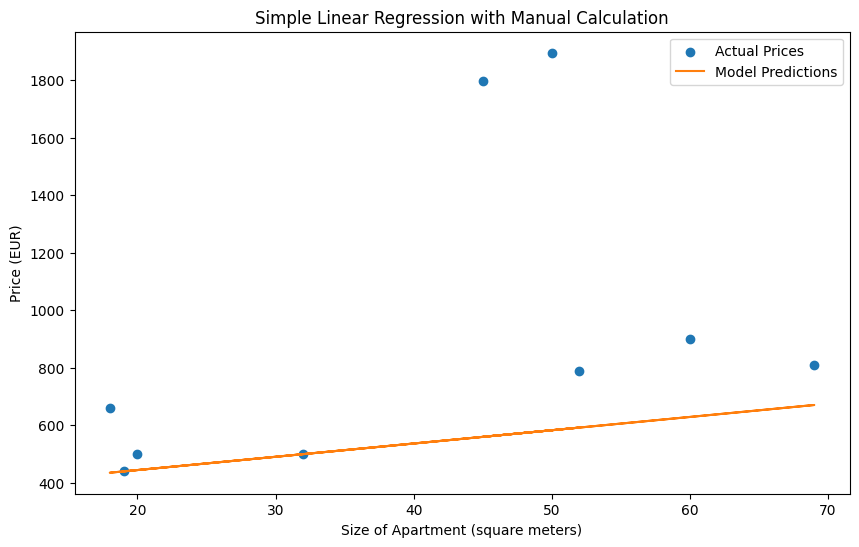

In [5]:
# Initialize the simple linear model
model = SimpleLinearModel()

# Fit the model using only the first two data points for simplicity
model.fit(size[:2], price[:2])

# Let's predict prices for the same range of apartment sizes
predicted_prices = model.predict(size)

# Plotting the data and the model predictions
plt.figure(figsize=(10, 6))
plt.scatter(size, price, color="C0", label='Actual Prices')
plt.plot(size, predicted_prices, color="C1", label='Model Predictions')
plt.title('Simple Linear Regression with Manual Calculation')
plt.xlabel('Size of Apartment (square meters)')
plt.ylabel('Price (EUR)')
plt.legend()
plt.show()

---

# 3) Calculate the Error (Mean Squared Error)

In this section, you will calculate how well a model performs by measuring the error between the actual values and the predicted values. One common way to compute this error is by using the Mean Squared Error (MSE).

The **MSE** is calculated by taking the average of the squared differences between the actual values (ground truth) and the predicted values. A lower MSE indicates that the model's predictions are closer to the actual values.

**Formula for MSE**: 

The **Mean Squared Error (MSE)** formula is:

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$

Where:
- $( y_{\text{true}, i} )$ is the actual value.
- $( y_{\text{pred}, i} )$ is the predicted value.
- $( n )$ is the number of data points.

**Tasks**

* Implement the Function: You'll program the MSE function to compute the error between the actual and predicted values.
* Use the Function: After writing the function, you'll use it to calculate the error for the set of data.


In [6]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    - y_true: array-like, actual values (ground truth)
    - y_pred: array-like, predicted values

    Returns:
    - mse: float, the mean squared error
    """
    # Ensure inputs are NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the squared differences
    squared_differences = (y_true - y_pred) ** 2
    
    # Return the mean of the squared differences
    mse = np.mean(squared_differences)
    return mse

In [7]:
# Predict prices for all apartment sizes
predicted_prices = model.predict(size)

# Now calculate the MSE between the actual prices and the predicted prices
mse_value = mean_squared_error(price, predicted_prices)

print(f"Calculated Mean Squared Error: {mse_value:.2f}")


Calculated Mean Squared Error: 381296.68


---

# 4) Interactive Visualization: Adjusting the Slope and Intercept with Error Bars

In this section, your task is to build an interactive visualization that allows you to dynamically adjust the slope and intercept of a linear model using sliders. This will give you a hands-on way to understand how changes in these parameters affect the model's predictions and how well it fits the data.

The visualization will allow you to manually adjust the slope and intercept of the linear regression model using sliders. It should dynamically update the plot to show how the line changes with these adjustments. Furthermore, you should show error bars between the data points and the fitted line, as well as the current MSE as a quantitative measure of how well your manually adjusted model fits the data.

**Tasks**

Your task is to create an interactive plot with the following features:

* Sliders: Two sliders, one for the slope and one for the intercept, which can be adjusted interactively.
* Plot: A scatter plot of the actual apartment prices vs. apartment sizes. And a line representing the model’s predictions, which will be updated based on the values of the slope and intercept you set.
* Error Bars: Vertical error bars should be drawn between the actual prices and the predicted prices, showing the errors visually.
* MSE Calculation: The Mean Squared Error (MSE) should be calculated and displayed on the plot to provide a numerical measure of how well the model fits the data.

Below is a simple example for a widget -- and how to call this. In general, this consists of an `update function` that is initialized in the `interact(...)` call at the end -- and which is connected to a widget.

In [8]:
import ipywidgets as widgets
from ipywidgets import interact

# Define the function that updates the plot
def update_plot(y_position=0):
    plt.figure(figsize=(6, 4))
    
    # Plot a horizontal line at y = y_position
    plt.axhline(y=y_position, color='blue', linestyle='--', label=f'y = {y_position}')
    
    # Set plot limits and labels
    plt.ylim(-10, 10)
    plt.xlim(0, 10)
    plt.title('Interactive Horizontal Line')
    plt.show()

    # Display the dummy variable in a text output
    print(f"Dummy variable: {y_position:.2f}")

# Create a slider widget for adjusting the y-position of the horizontal line
slider = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0)

# Use the interact function to create the interactive widget
interact(update_plot, y_position=slider)


interactive(children=(FloatSlider(value=0.0, description='y_position', max=10.0, min=-10.0), Output()), _dom_c…

<function __main__.update_plot(y_position=0)>

In [9]:
import ipywidgets as widgets
from ipywidgets import interact

# Function to plot with adjustable slope and intercept
def update_plot(slope=1, intercept=0):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the actual data
    plt.scatter(size, price, color="C0", label='Actual Prices')
    
    # Line equation: y = slope * x + intercept
    predicted_prices = slope * size + intercept
    
    # Plot the fitted line with the current slope and intercept
    plt.plot(size, predicted_prices, color="C1", label=f'Line: y = {slope:.2f}x + {intercept:.2f}', linestyle='--')
    
    # Draw error bars: vertical lines between actual and predicted values
    for i in range(len(size)):
        plt.plot([size[i], size[i]], [price[i], predicted_prices[i]], color="C2", linestyle='-', lw=1.5)

    # Calculate and display the mean squared error (MSE)
    mse = mean_squared_error(price, predicted_prices)
    plt.text(0.5, 0.9, f'Mean Squared Error: {mse:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

    # Labels, title, and legend
    plt.title('Interactive Linear Regression: Adjust Slope and Intercept with Error Bars')
    plt.xlabel('Size of Apartment (square meters)')
    plt.ylabel('Price (EUR)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for slope and intercept
interact(update_plot, slope=widgets.FloatSlider(min=-10, max=50, step=0.1, value=1), 
         intercept=widgets.FloatSlider(min=-1000, max=3000, step=50, value=0));

interactive(children=(FloatSlider(value=1.0, description='slope', max=50.0, min=-10.0), FloatSlider(value=0.0,…

Find good values that appear fitting -- and that minimize the error.

**Additional task for visualization**

We can examine how the error (Mean Squared Error, MSE) changes when we vary the intercept $b$ and the slope $m$ individually, while keeping the other parameter fixed. This can be visualized.

** Task**

* We'll fix one parameter (either the slope or the intercept) and vary the other to observe how the error changes.
* We'll create two subplots:
    * One for varying $b$ (intercept) while keeping $m$ (slope) constant.
    * One for varying $m$ (slope) while keeping $b$ (intercept) constant.
* We'll compute the MSE for each variation and plot the results.

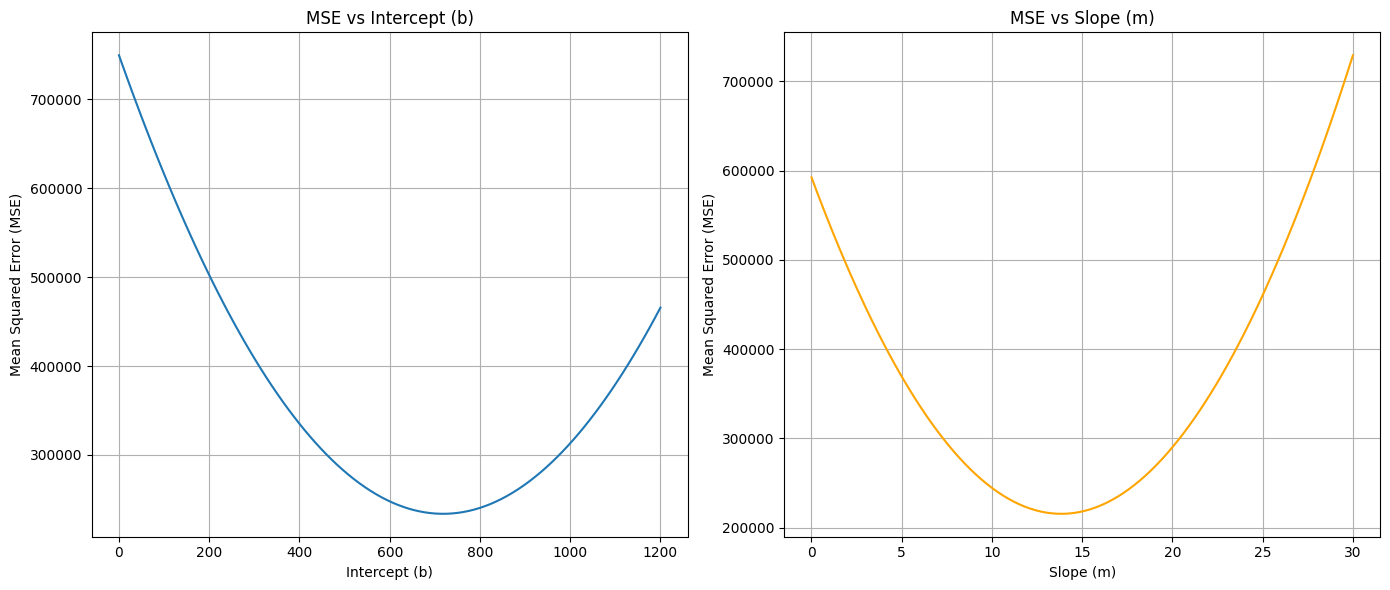

In [11]:
# Create an instance of SimpleLinearModel
model = SimpleLinearModel()

# Initial values for slope (m) and intercept (b)
fixed_m = 5  # Fixed slope for varying b
fixed_b = 350  # Fixed intercept for varying m

# Range for intercept (b) and slope (m)
b_values = np.linspace(0, 1200, 100)  # Vary intercept b from 400 to 800
m_values = np.linspace(0, 30, 100)  # Vary slope m from 10 to 30

# Calculate MSE for varying b (with fixed m)
mse_for_b = []
for b in b_values:
    model.set_params(fixed_m, b)  # Set fixed slope and varying intercept
    predictions = model.predict(size)
    mse = mean_squared_error(price, predictions)
    mse_for_b.append(mse)

# Calculate MSE for varying m (with fixed b)
mse_for_m = []
for m in m_values:
    model.set_params(m, fixed_b)  # Set fixed intercept and varying slope
    predictions = model.predict(size)
    mse = mean_squared_error(price, predictions)
    mse_for_m.append(mse)

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for varying b (intercept)
ax[0].plot(b_values, mse_for_b, label='MSE for varying intercept (b)')
ax[0].set_title('MSE vs Intercept (b)')
ax[0].set_xlabel('Intercept (b)')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].grid(True)

# Plot for varying m (slope)
ax[1].plot(m_values, mse_for_m, label='MSE for varying slope (m)', color='orange')
ax[1].set_title('MSE vs Slope (m)')
ax[1].set_xlabel('Slope (m)')
ax[1].set_ylabel('Mean Squared Error (MSE)')
ax[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

---

When manually adjusting the slope and intercept using sliders to find a good fit for a linear regression model, you're essentially trying to minimize the error (in this case, the Mean Squared Error (MSE)) between the predicted values and the actual values. Instead of adjusting parameters manually, we can automate this process using an iterative algorithm like gradient descent, which is commonly used for optimizing functions.

# 5) Concept of Gradient Descent for Linear Regression

Gradient descent is an optimization algorithm used to minimize a cost function (in this case, MSE). It works by iteratively adjusting the parameters (slope and intercept) in the direction of the steepest descent (i.e., the negative gradient of the cost function) until it finds a local minimum.

How Gradient Descent Works:

1. Initialize the parameters: Start with some initial values for the slope $(m)$ and intercept $(b)$.
2. Compute the error (MSE): Calculate the MSE for the current parameters.
3. Update the parameters: Change the parameters in such a way that the MSE is getting smaller. You can use the gradients (partial derivatives) of the cost function with respect to $m$ and $b$ to adjust the parameters in small steps. The size of the step is controlled by a learning rate $(\alpha)$.
4. Repeat: Continue updating the parameters iteratively until the error stops decreasing (i.e., converges).

In the two following tasks, you will go through these four steps. Only step three will be different in the two versions.

**First sub-task: Brute-force search for better parameters**

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* For each of the parameter: slightly adjust each parameter individually and compute after each small adaptation the MSE again. If the error decreased, stick with the newly selected parameter.
* repeat ...

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

In [13]:
# Brute-force training function
def brute_force_training(X, y, initial_m=0, initial_b=0, step_size=0.01, iterations=1000):
    m = initial_m  # Start with an initial slope
    b = initial_b  # Start with an initial intercept
    n = len(X)  # Number of data points
    
    # Compute initial error
    y_pred = m * X + b
    current_mse = mean_squared_error(y, y_pred)
    
    for i in range(iterations):
        # Try adjusting the slope (m) by a small amount
        new_m = m + step_size
        new_y_pred_m = new_m * X + b
        new_mse_m = mean_squared_error(y, new_y_pred_m)
        
        # If the error decreased, accept the new slope
        if new_mse_m < current_mse:
            m = new_m
            current_mse = new_mse_m
        
        # Try adjusting the intercept (b) by a small amount
        new_b = b + step_size
        new_y_pred_b = m * X + new_b
        new_mse_b = mean_squared_error(y, new_y_pred_b)
        
        # If the error decreased, accept the new intercept
        if new_mse_b < current_mse:
            b = new_b
            current_mse = new_mse_b
        
        # Optionally, print the status every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: MSE = {current_mse:.4f}, m = {m:.4f}, b = {b:.4f}")
    
    return m, b, current_mse

# Run brute-force training with small initial values and small step size
optimal_m, optimal_b, final_mse = brute_force_training(size, price, initial_m=0, initial_b=0, step_size=0.01, iterations=10000)

print(f"Optimal slope (m): {optimal_m:.4f}")
print(f"Optimal intercept (b): {optimal_b:.4f}")
print(f"Final MSE: {final_mse:.4f}")


Iteration 0: MSE = 1113870.1493, m = 0.0100, b = 0.0100
Iteration 100: MSE = 1031287.5671, m = 1.0100, b = 1.0100
Iteration 200: MSE = 952802.3182, m = 2.0100, b = 2.0100
Iteration 300: MSE = 878414.4026, m = 3.0100, b = 3.0100
Iteration 400: MSE = 808123.8204, m = 4.0100, b = 4.0100
Iteration 500: MSE = 741930.5715, m = 5.0100, b = 5.0100
Iteration 600: MSE = 679834.6560, m = 6.0100, b = 6.0100
Iteration 700: MSE = 621836.0738, m = 7.0100, b = 7.0100
Iteration 800: MSE = 567934.8249, m = 8.0100, b = 8.0100
Iteration 900: MSE = 518130.9093, m = 9.0100, b = 9.0100
Iteration 1000: MSE = 472424.3271, m = 10.0100, b = 10.0100
Iteration 1100: MSE = 430815.0782, m = 11.0100, b = 11.0100
Iteration 1200: MSE = 393303.1626, m = 12.0100, b = 12.0100
Iteration 1300: MSE = 359888.5804, m = 13.0100, b = 13.0100
Iteration 1400: MSE = 330571.3315, m = 14.0100, b = 14.0100
Iteration 1500: MSE = 305351.4160, m = 15.0100, b = 15.0100
Iteration 1600: MSE = 284228.8338, m = 16.0100, b = 16.0100
Iteration 

**Second sub-task: Gradient descent**

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* Calculate gradients: Compute the partial derivatives (gradients) of the MSE with respect to $m$ (slope) and $b$ (intercept).
* Update parameters: Adjust the values of $m$ and $b$ using the gradients. The amount by which you adjust the parameters is controlled by a learning rate (start with a small value, e.g., $\alpha = 0.0001$ and run for a couple of thousand iterations).
* Repeat: Continue adjusting the parameters iteratively until the error converges to a minimum. 

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

*Formulae for Gradient Descent* 

For linear regression, the MSE is defined as:

$$
\text{MSE}(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$$

Where

* $y_{\text{pred}, i} = m \cdot x_i + b$

*The partial derivatives of the cost function (MSE) are:*

* Gradient with respect to $m$ (slope): $\frac{\partial}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i}) \cdot x_i$

* Gradient with respect to $b$ (intercept): $\frac{\partial}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})$

*Gradient Descent Updates:*

The update rules for the slope $m$ and intercept $b$ are:


* $m = m - \alpha \cdot \frac{\partial}{\partial m} \text{MSE}(m, b)$

* $b = b - \alpha \cdot \frac{\partial}{\partial b} \text{MSE}(m, b)$


In [14]:
# Gradient Descent for Linear Regression
def gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    m = 0  # Initial slope
    b = 0  # Initial intercept
    n = len(X)  # Number of data points
    
    for i in range(iterations):
        # Make predictions using current m and b
        y_pred = m * X + b
        
        # Calculate the gradients
        dm = (-2 / n) * np.sum((y - y_pred) * X)  # Gradient w.r.t. m
        db = (-2 / n) * np.sum(y - y_pred)        # Gradient w.r.t. b
        
        # Update the parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db
        
        # Print progress every 100 iterations
        if i % 100 == 0:
            mse = mean_squared_error(y, y_pred)
            print(f"Iteration {i}: MSE = {mse:.4f}, m = {m:.4f}, b = {b:.4f}")
    
    return m, b

# Perform gradient descent to find the optimal slope and intercept
optimal_m, optimal_b = gradient_descent(size, price, learning_rate=0.0001, iterations=10000)

print(f"Optimal slope (m): {optimal_m:.4f}")
print(f"Optimal intercept (b): {optimal_b:.4f}")


Iteration 0: MSE = 1114716.6667, m = 8.2830, b = 0.1842
Iteration 100: MSE = 242293.8440, m = 21.0236, b = 1.7839
Iteration 200: MSE = 242116.3557, m = 20.9961, b = 3.1158
Iteration 300: MSE = 241940.0248, m = 20.9687, b = 4.4434
Iteration 400: MSE = 241764.8439, m = 20.9414, b = 5.7666
Iteration 500: MSE = 241590.8055, m = 20.9142, b = 7.0855
Iteration 600: MSE = 241417.9020, m = 20.8871, b = 8.4001
Iteration 700: MSE = 241246.1261, m = 20.8601, b = 9.7105
Iteration 800: MSE = 241075.4705, m = 20.8332, b = 11.0165
Iteration 900: MSE = 240905.9277, m = 20.8063, b = 12.3183
Iteration 1000: MSE = 240737.4907, m = 20.7795, b = 13.6158
Iteration 1100: MSE = 240570.1520, m = 20.7529, b = 14.9091
Iteration 1200: MSE = 240403.9047, m = 20.7263, b = 16.1982
Iteration 1300: MSE = 240238.7416, m = 20.6998, b = 17.4830
Iteration 1400: MSE = 240074.6556, m = 20.6734, b = 18.7637
Iteration 1500: MSE = 239911.6396, m = 20.6471, b = 20.0401
Iteration 1600: MSE = 239749.6868, m = 20.6208, b = 21.3124


# 6) Learning in a Simple Linear Model 

Refactor your code into a class called SimpleLinearModel: 

* the fit method should perform gradient descent,
* and a predict method makes predictions based on the learned parameters (slope and intercept).
* You should also add a function for the MSE.

In [16]:
class SimpleLinearModel:
    def __init__(self):
        # Initialize slope and intercept
        self.m = 0  # Slope
        self.b = 0  # Intercept
    
    def mean_squared_error(self, y_true, y_pred):
        """Calculate Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y, learning_rate=0.001, iterations=1000):
        """Fit the model using gradient descent."""
        n = len(X)  # Number of data points
        self.m = 0  # Initialize slope
        self.b = 0  # Initialize intercept
        
        mse_history = []  # To store MSE values for the learning curve (as a return)
        
        # Perform gradient descent
        for i in range(iterations):
            # Predict the current y values
            y_pred = self.m * X + self.b
            
            # Calculate the gradients
            dm = (-2 / n) * np.sum((y - y_pred) * X)  # Gradient w.r.t. m
            db = (-2 / n) * np.sum(y - y_pred)        # Gradient w.r.t. b
            
            # Update the parameters
            self.m -= learning_rate * dm
            self.b -= learning_rate * db
            
            # Compute and store the MSE for learning curve
            mse = self.mean_squared_error(y, y_pred)
            mse_history.append(mse)
            
            # Optionally, print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mse:.4f}, m = {self.m:.4f}, b = {self.b:.4f}")
        
        return mse_history

    def predict(self, X):
        """Predict values using the learned slope and intercept."""
        return self.m * X + self.b
    
# Create an instance of SimpleLinearModel
# model = SimpleLinearModel()

# Test 1: Fit the model and track the MSE history
# print("Running gradient descent...")
# mse_history = model.fit(size, price, learning_rate=0.0001, iterations=10000)

**Subtask: Visualize the learning**

A **learning curve** visualizes how the MSE changes during training, giving us an indication of the model's learning progress during gradient descent.

Task: Plot a learning curve (you might have to change your gradient descent approach as you require to observe the error during training).

Iteration 0: MSE = 1114716.6667, m = 8.2830, b = 0.1842
Iteration 100: MSE = 242293.8440, m = 21.0236, b = 1.7839
Iteration 200: MSE = 242116.3557, m = 20.9961, b = 3.1158
Iteration 300: MSE = 241940.0248, m = 20.9687, b = 4.4434
Iteration 400: MSE = 241764.8439, m = 20.9414, b = 5.7666
Iteration 500: MSE = 241590.8055, m = 20.9142, b = 7.0855
Iteration 600: MSE = 241417.9020, m = 20.8871, b = 8.4001
Iteration 700: MSE = 241246.1261, m = 20.8601, b = 9.7105
Iteration 800: MSE = 241075.4705, m = 20.8332, b = 11.0165
Iteration 900: MSE = 240905.9277, m = 20.8063, b = 12.3183
Iteration 1000: MSE = 240737.4907, m = 20.7795, b = 13.6158
Iteration 1100: MSE = 240570.1520, m = 20.7529, b = 14.9091
Iteration 1200: MSE = 240403.9047, m = 20.7263, b = 16.1982
Iteration 1300: MSE = 240238.7416, m = 20.6998, b = 17.4830
Iteration 1400: MSE = 240074.6556, m = 20.6734, b = 18.7637
Iteration 1500: MSE = 239911.6396, m = 20.6471, b = 20.0401
Iteration 1600: MSE = 239749.6868, m = 20.6208, b = 21.3124


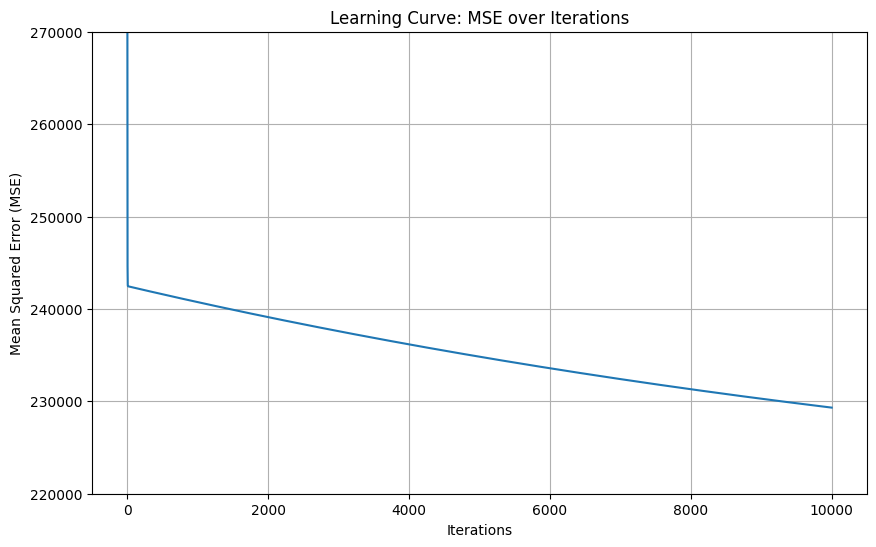

In [17]:
# Create an instance of the SimpleLinearModel class
model = SimpleLinearModel()

# Fit the model using gradient descent and collect the MSE history for the learning curve
mse_history = model.fit(size, price, learning_rate=0.0001, iterations=10000)

# Plot the learning curve (MSE over iterations)
plt.figure(figsize=(10, 6))
plt.plot(mse_history)
#plt.yscale('log') 
plt.ylim(2.2e5,2.7e5)
plt.title('Learning Curve: MSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


---

# 7) Finding the Optimal Values Analytically for Simple Linear Regression

In this task, you are required to compute the optimal slope $(m)$ and intercept $(b)$ analytically for a simple linear regression problem. Instead of using iterative methods like gradient descent or brute-force optimization, you will directly calculate the values of 
$m$ and $b$ that minimize the Mean Squared Error (MSE) using closed-form solutions.

**Overview:**

For simple linear regression, the relationship between the independent variable $(x)$ (e.g., apartment size) and the dependent variable $(y)$ (e.g., price) is modeled as:
$$
y = m \cdot x + b
$$

Where:
- $m$ is the slope (or coefficient) that determines how much $y$ changes as $x$ changes.
- $b$ is the intercept, which is the value of $y$ when $x = 0$.

The goal is to find the values of $m$ and $b$ that minimize the *Mean Squared Error (MSE)*. This can be done analytically using the following closed-form equations.

Try to find the analytical solution!

**Analytical Solutions for $m$ and $b$:**

The optimal slope \(m\) and intercept \(b\) for linear regression can be found using the *least squares method*:

1. *Optimal Slope ($m$)*:
$$
   m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2}
$$

Where:

* $n$ is the number of data points.
* $\sum x_i y_i$ is the sum of the products of $x_i$ and $y_i$.
* $\sum x_i$ is the sum of the $x$-values.
* $\sum y_i$ is the sum of the $y$-values.
* $\sum x_i^2$ is the sum of the squared $x$-values.

2. *Optimal Intercept ($b$)*:
$$
   b = \frac{\sum y_i - m \sum x_i}{n}
$$

Where $m$ is the slope computed from the formula above.

**Task Instructions:**

1. Compute the sums required for the formulae above.
2. Use the formulae provided above to compute the optimal slope $m$ and intercept $b$.
3. Once you have the analytical solutions for $m$ and $b$, use them to predict $y$-values for any given $x$-values (e.g., apartment sizes) and compare the predictions with the actual prices.
4. Calculate the Mean Squared Error (MSE) for these predictions to verify that the analytically computed values for $m$ and $b$ minimize the error.

In [19]:
# Number of data points
n = len(size)

# Step 1: Compute the necessary sums
sum_x = np.sum(size)
sum_y = np.sum(price)
sum_xy = np.sum(size * price)
sum_x_squared = np.sum(size ** 2)

# Step 2: Calculate the optimal slope (m) and intercept (b)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
b = (sum_y - m * sum_x) / n

# Display the results
print(f"Optimal slope (m): {m:.4f}")
print(f"Optimal intercept (b): {b:.4f}")

# Step 3: Predict values using the analytically computed slope and intercept
predicted_prices = m * size + b

# Step 4: Calculate the Mean Squared Error
mse = np.mean((price - predicted_prices) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Optimal slope (m): 12.6128
Optimal intercept (b): 409.5924
Mean Squared Error (MSE): 215077.8506


--- 

# 8) Adding another input dimension

As a last step, change your model and it should take two input dimensions (size and distance to city center).

**Tasks:**

* extract features for X and y from original data
* change your different models (or one of these as a start): the gradient descent one and the analytical one
* find an optimal solution
* visualize the three dimensional data


In [20]:
# Step 1: Extract the features (size and distance_to_center) and target (price) from the dictionaries
sizes = np.array([apt['size'] for apt in data])  # Feature 1: size of the apartment
distances = np.array([apt['distance_to_center'] for apt in data])  # Feature 2: distance to city center
prices = np.array([apt['price'] for apt in data])  # Target variable: price of the apartment

# Step 2: Create the input matrix X with a column of 1s for the intercept
X = np.column_stack((np.ones(sizes.shape[0]), sizes, distances))

In [21]:
class LinearModel:
    def __init__(self, learning_rate=0.001, iterations=1000):
        # Initialize hyperparameters
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Coefficients (including intercept)

    def mean_squared_error(self, y_true, y_pred):
        """Calculate Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y):
        """
        Fit the model using Stochastic Gradient Descent (SGD).
        
        Parameters:
        - X: Input feature matrix (size, distance_to_center, etc.)
        - y: Target variable (prices)
        """
        n_samples, n_features = X.shape
        # Add a column of ones for the intercept term
        X_b = np.column_stack((np.ones(n_samples), X))
        
        # Initialize theta (coefficients + intercept) to zeros
        self.theta = np.zeros(X_b.shape[1])
        
        # Perform Stochastic Gradient Descent (SGD)
        for _ in range(self.iterations):
            for i in range(n_samples):
                # Randomly pick a sample for stochastic update
                xi = X_b[i, :]
                yi = y[i]
                
                # Prediction for the current sample
                y_pred = np.dot(xi, self.theta)
                
                # Compute the gradient for this sample
                error = y_pred - yi
                gradient = xi * error
                
                # Update the parameters (theta)
                self.theta -= self.learning_rate * gradient

    def predict(self, X):
        """
        Predict target values using the learned coefficients (theta).
        
        Parameters:
        - X: Input feature matrix (without intercept term)
        
        Returns:
        - Predicted target values (y_pred)
        """
        # Add a column of ones for the intercept term
        X_b = np.column_stack((np.ones(X.shape[0]), X))
        
        # Predict using the learned coefficients
        return np.dot(X_b, self.theta)

model = LinearModel(learning_rate=0.00001, iterations=10000)
model.fit(X, prices)
# Make predictions using the model
predicted_prices = model.predict(X)
# Calculate the Mean Squared Error (MSE)
mse = model.mean_squared_error(prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Print the learned parameters (theta)
print("Learned parameters (theta):")
print(f"Intercept (b): {model.theta[0]:.4f}")
print(f"Slope for size (m1): {model.theta[1]:.4f}")
print(f"Slope for distance to city (m2): {model.theta[2]:.4f}")

Mean Squared Error (MSE): 186019.8890
Learned parameters (theta):
Intercept (b): 78.8239
Slope for size (m1): 78.8239
Slope for distance to city (m2): 23.2772


In [22]:
# ANALYTICAL SOLUTION
# Step 3: Use the normal equation to compute the optimal parameters
theta = np.linalg.inv(X.T @ X) @ X.T @ prices

# Extract the parameters (intercept, slope for size, and slope for distance)
b = theta[0]
m1 = theta[1]
m2 = theta[2]

# Step 4: Display the results
print(f"Optimal intercept (b): {b:.4f}")
print(f"Optimal slope for size (m1): {m1:.4f}")
print(f"Optimal slope for distance to city (m2): {m2:.4f}")

# Step 5: Predict values using the computed parameters
predicted_prices = X @ theta

# Step 6: Calculate the Mean Squared Error (MSE)
mse = np.mean((prices - predicted_prices) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Optimal intercept (b): 829.6416
Optimal slope for size (m1): 12.7672
Optimal slope for distance to city (m2): -125.7971
Mean Squared Error (MSE): 130881.3694


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 10.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>